# Spam Email Detection

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
data = pd.read_csv('D:\intern\Project 2\Spam Email Detection - spam.csv')

In [3]:
# Display dataset information
print(data.info())
print(data.head())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN 

In [4]:
# Shape of the dataset
print("Dataset shape:", data.shape)

# Basic information
print("\nDataset Info:")
print(data.info())

# Null values
print("\nMissing Values:")
print(data.isnull().sum())

# Class distribution
print("\nClass Distribution:")
print(data['v1'].value_counts())

# Rename columns for better clarity
data.rename(columns={'v1': 'Label', 'v2': 'Text'}, inplace=True)


Dataset shape: (5572, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Class Distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64


Performing EDA

Histograms

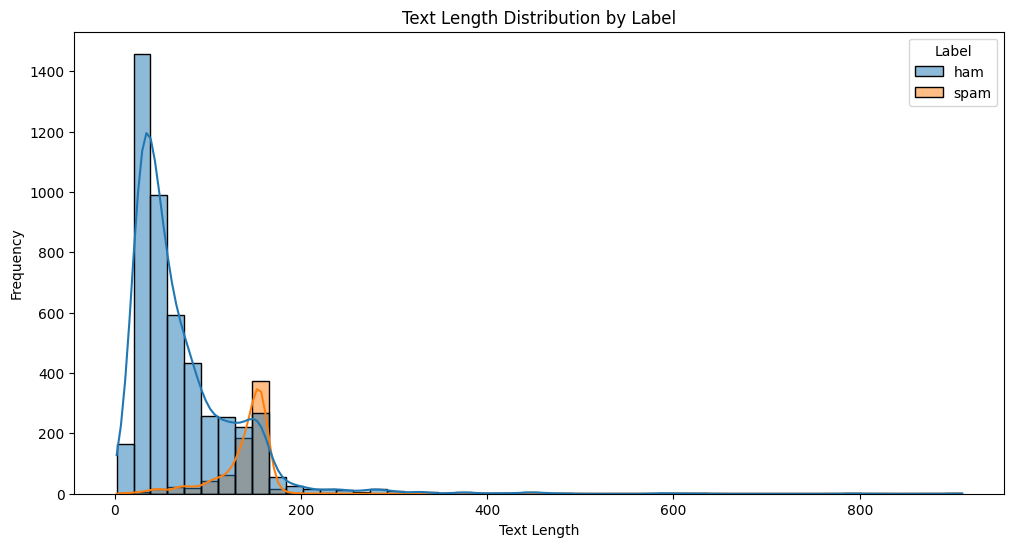

In [5]:
# Add a new column for text length
data['Text_Length'] = data['Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(data, x='Text_Length', hue='Label', bins=50, kde=True)
plt.title("Text Length Distribution by Label")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

Word Cloud

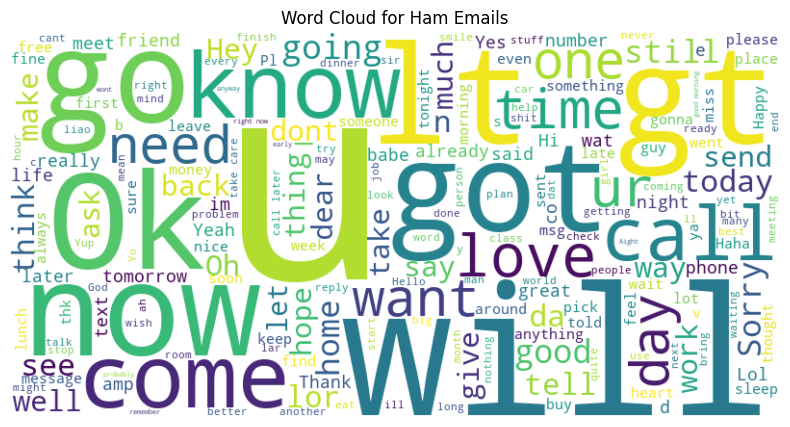

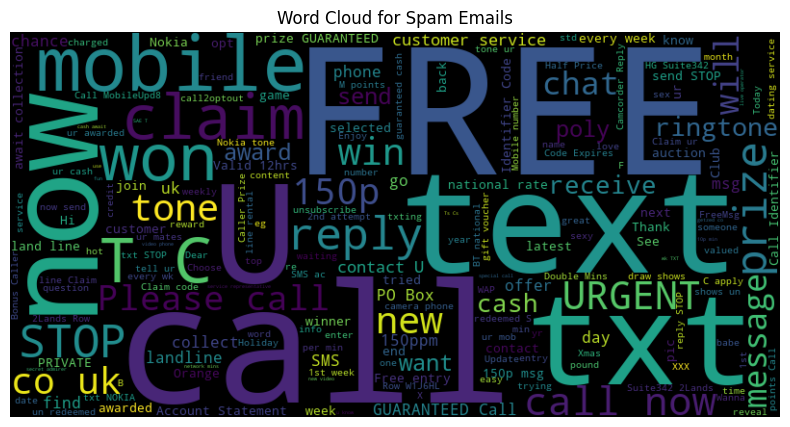

In [6]:
# Word Cloud for Ham Emails
ham_text = ' '.join(data[data['Label'] == 'ham']['Text'])
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Emails')
plt.show()

# Word Cloud for Spam Emails
spam_text = ' '.join(data[data['Label'] == 'spam']['Text'])
spam_wc = WordCloud(width=800, height=400, background_color='black').generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

Frequency Distribution

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


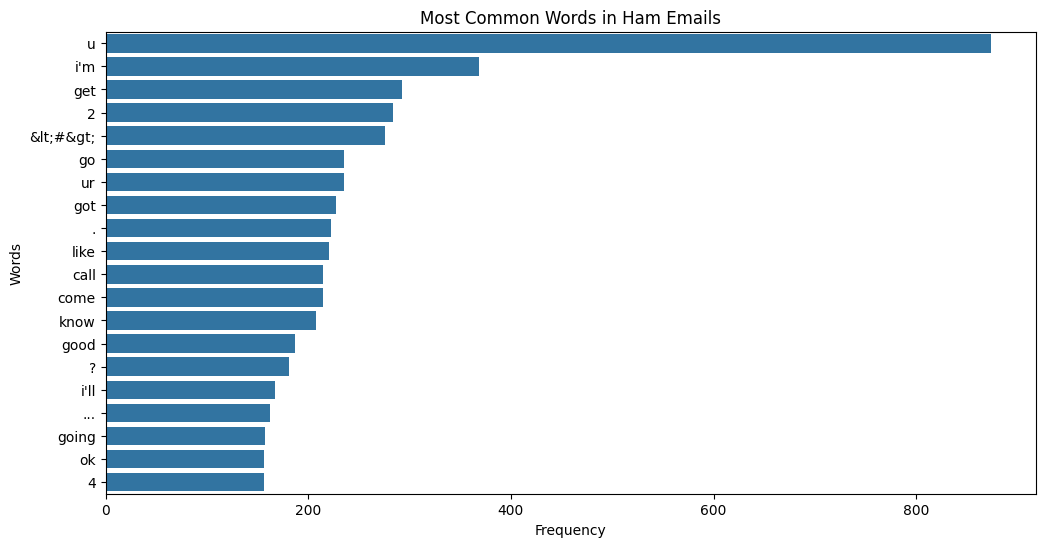

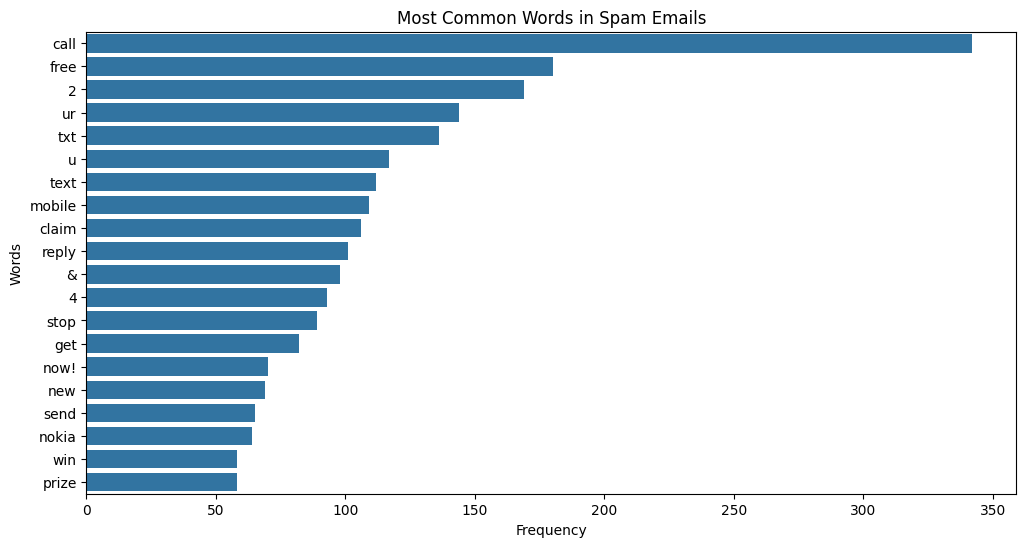

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to tokenize and clean text
def clean_text(text):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    return words

# Most common words in Ham
ham_words = clean_text(' '.join(data[data['Label'] == 'ham']['Text']))
ham_common = Counter(ham_words).most_common(20)

# Most common words in Spam
spam_words = clean_text(' '.join(data[data['Label'] == 'spam']['Text']))
spam_common = Counter(spam_words).most_common(20)

# Plot most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[1] for word in ham_common], y=[word[0] for word in ham_common])
plt.title("Most Common Words in Ham Emails")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=[word[1] for word in spam_common], y=[word[0] for word in spam_common])
plt.title("Most Common Words in Spam Emails")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

Correlation Heatmap

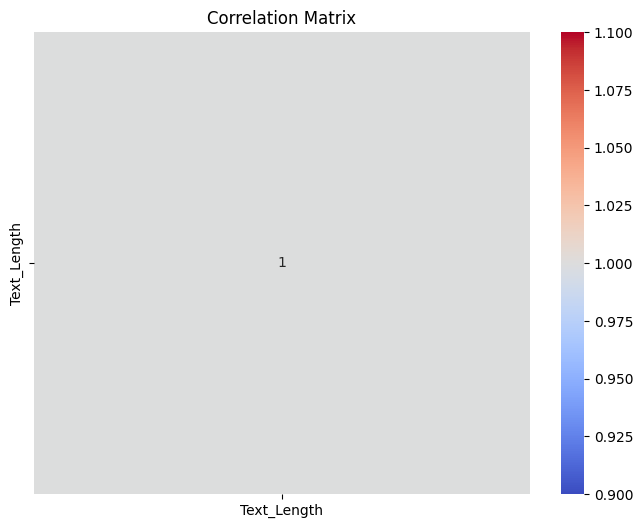

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = data[['Text_Length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Training Naive Bayes...
Accuracy for Naive Bayes: 0.98

Confusion Matrix:
[[1436   12]
 [  16  208]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1448
        Spam       0.95      0.93      0.94       224

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



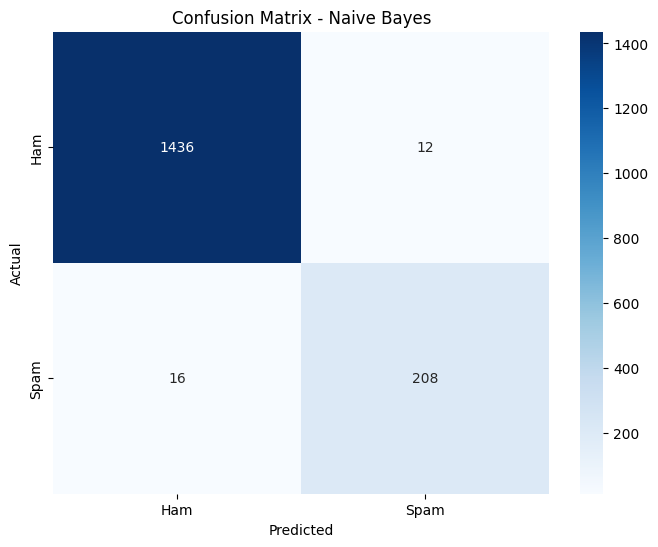


Training Logistic Regression...
Accuracy for Logistic Regression: 0.98

Confusion Matrix:
[[1448    0]
 [  40  184]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99      1448
        Spam       1.00      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



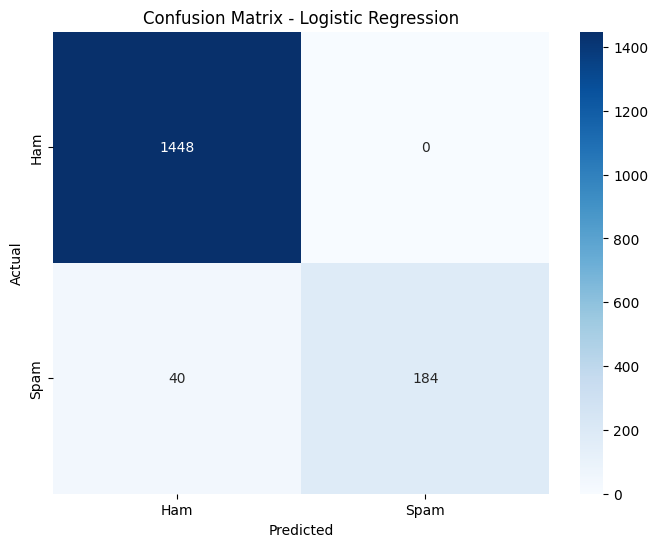


Training Support Vector Machine...
Accuracy for Support Vector Machine: 0.98

Confusion Matrix:
[[1448    0]
 [  38  186]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99      1448
        Spam       1.00      0.83      0.91       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



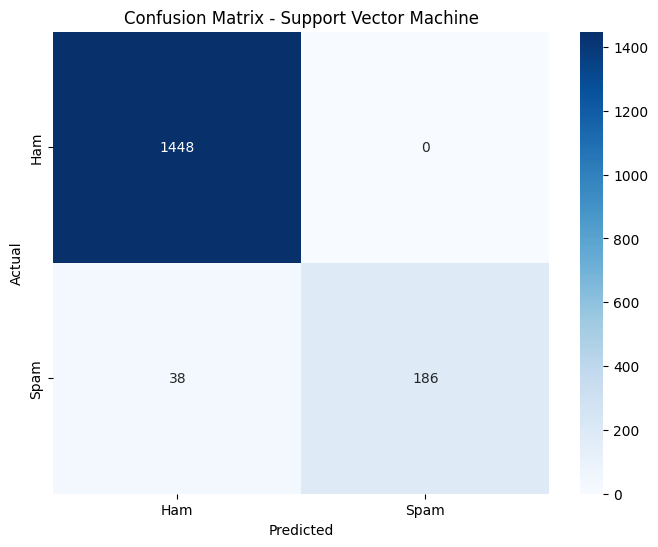


Training Random Forest...
Accuracy for Random Forest: 0.97

Confusion Matrix:
[[1448    0]
 [  44  180]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99      1448
        Spam       1.00      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



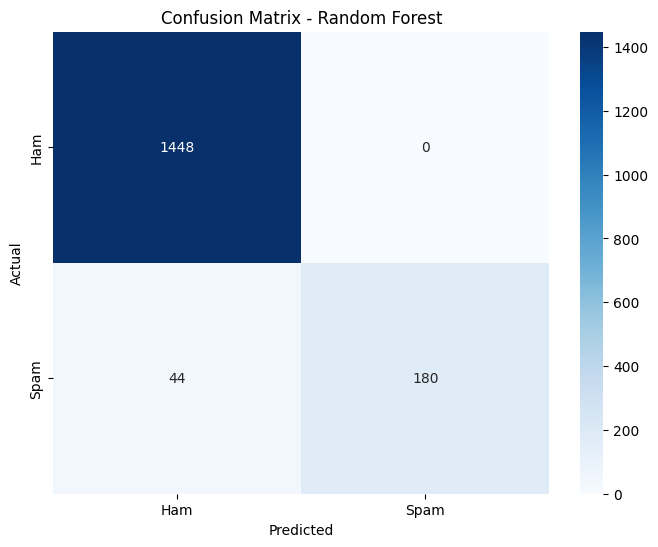


Summary for Naive Bayes:
Accuracy: 0.98
Confusion Matrix:
[[1436   12]
 [  16  208]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1448
        Spam       0.95      0.93      0.94       224

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672


Summary for Logistic Regression:
Accuracy: 0.98
Confusion Matrix:
[[1448    0]
 [  40  184]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99      1448
        Spam       1.00      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672


Summary for Support Vector Machine:
Accuracy: 0.98
Confusion Matrix:
[[1448    0]
 [  38  186]]

Classification Repor

In [9]:
# Splitting data into features and labels
X = data['Text']  # Feature: Email text
y = data['Label']  # Target: Spam or Ham

# Encode labels: 'spam' -> 1, 'ham' -> 0
y = y.map({'spam': 1, 'ham': 0})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Vectorizing text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Models to train
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])

    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "conf_matrix": conf_matrix,
        "class_report": class_report
    }

    # Print metrics
    print(f"Accuracy for {model_name}: {accuracy:.2f}\n")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Summary of results
for model_name, metrics in results.items():
    print(f"\nSummary for {model_name}:")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(metrics['conf_matrix'])
    print("\nClassification Report:")
    print(metrics['class_report'])


Spam Detector

In [10]:
# Splitting data into features and labels
X = data['Text']  # Feature: Email text
y = data['Label']  # Target: Spam or Ham

# Encode labels: 'spam' -> 1, 'ham' -> 0
y = y.map({'spam': 1, 'ham': 0})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Vectorizing text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Using Logistic Regression as the final model
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_vec, y_train)

def spam_detector():
    """Interactive function to classify an email as Spam or Ham."""
    while True:
        email_text = input("Enter an email text to classify (or type 'exit' to quit): ")
        if email_text.lower() == 'exit':
            print("Exiting the spam detector. Goodbye!")
            break
        # Vectorize the input email
        email_vec = vectorizer.transform([email_text])
        # Predict and classify
        prediction = final_model.predict(email_vec)
        result = "Spam" if prediction[0] == 1 else "Ham"
        print(f"The email is classified as: {result}\n")

# To use the spam detector, call spam_detector() in the notebook cell
spam_detector()

The email is classified as: Ham

The email is classified as: Ham

Exiting the spam detector. Goodbye!
